 ## Human Activity Recognition
 
 This notebook is written for initial implementation of final year research project. The objective of this implementation and analysis is to better understand the tradional approach to sensor-based human activity recognition. part-2 of this research will be focused on the application of deep learning techniques to sensor-based human actitvity recognition and coming up with deep learing architecture which improves the classification results.

In [2]:
import os
import pandas as pd
import numpy as np
from glob import glob
import torch
import random
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
root = "Data Sets\HAPT Data Set"
# data = open(root+"\Train\X_train.txt")
# data = data.read().split('\n')

#we are loading the train data and labels..
# these are handcrafed features! preprocesed by domain experts!

train_x = pd.read_csv(root+"\Train\X_train.txt", delim_whitespace=True , header= None )
test_x  = pd.read_csv(root+"\Test\X_test.txt", delim_whitespace=True , header= None )
test_y  = pd.read_csv(root+"\Test\y_test.txt", header= None)
train_y = pd.read_csv(root+"\Train\y_train.txt", header= None)

In [7]:
#checking the shapes of loaded data
print("Some Examples from the training Set")
train_x.head()


Some Examples from the training Set


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [8]:

print("Some Examples from the test Set")
test_x.head()

Some Examples from the test Set


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [10]:
train_y[:100]

,0
0,5
1,5
2,5
3,5
4,5
...,...
95,1
96,1
97,1
98,1


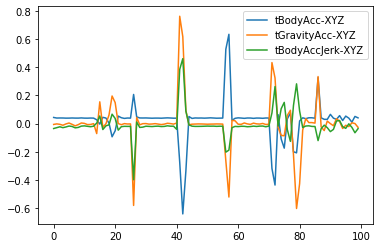

In [16]:
feature1 = train_x.iloc[:100,:1]
feature2 = train_x.iloc[:100,1:2]
feature3 = train_x.iloc[:100,2:3]



plt.plot(feature1, label = "tBodyAcc-XYZ")
plt.plot(feature2, label = "tGravityAcc-XYZ")
plt.plot(feature3, label = "tBodyAccJerk-XYZ")
plt.legend()

## Understanding and Visualizing Data 

In [4]:

data = pd.concat([train_x,train_y],axis=1)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,0
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5


In [142]:
print(data.iloc[:,-1].value_counts()) # we can see the class imbalance here.

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: 0, dtype: int64


In [67]:
##implementatation of custome dataset

class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, labels, transform = None):
        'Initialization'
        self.labels = labels #to one-hot encode the labels
        self.data = data
        self.T = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        x = self.data[index]
        # Load data and get label
        y = self.labels[index]
        if(self.T):
            x = self.T(x)
            
        return x, y

In [68]:
#custome dataset object that filts your needs
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# for changing the labels range to 0, n_classes -1
train_labels = encoder.fit_transform(train_y.values)
test_labels  = encoder.fit_transform(test_y.values)

transform = transforms.ToTensor()
train_data = Dataset(train_x.values , train_labels)
test_data  = Dataset(test_x.values , test_labels)

train_loader  = torch.utils.data.DataLoader(train_data, shuffle= True, batch_size= 32)
test_loader = torch.utils.data.DataLoader(test_data,shuffle = False , batch_size = 32)
#making trainloader for our dataset
activities, labels = next(iter(test_loader))

activities

C:\Users\adeen\Miniconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


tensor([[ 0.0309, -0.0089,  0.0404,  ..., -0.7206,  0.2768, -0.0511],
        [ 0.0425,  0.0011, -0.0262,  ..., -0.6987,  0.2813, -0.0768],
        [ 0.0383, -0.0117, -0.0256,  ..., -0.7034,  0.2801, -0.0723],
        ...,
        [ 0.0402, -0.0049, -0.0200,  ..., -0.8126,  0.1640, -0.0920],
        [-0.0293, -0.2648, -0.1592,  ..., -0.7103,  0.2940, -0.0190],
        [ 0.0517, -0.0063, -0.0167,  ..., -0.5931,  0.3788,  0.0015]],
       dtype=torch.float64)

## Creating Deep Neural Network 

In [124]:
#now that we  have loaded our data, we can now build our model for classification
from torch import nn
from torch import optim
import torch.nn.functional as F
class Model (nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(in_features=561 , out_features=256)
        self.fc2 = nn.Linear(in_features=256 , out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64 , out_features=32)
        self.fc5 = nn.Linear(in_features=32 , out_features=12)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc2(x)))
        x = F.relu(self.dropout(self.fc3(x)))
        x = F.relu(self.dropout(self.fc4(x)))
        x = F.log_softmax(self.dropout(self.fc5(x)), dim=1)
        
        return x
        
        

In [125]:
device = torch.cuda.is_available()

model = Model()

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.003)

if(device):
    model = model.to('cuda')

model.float()

Model(
  (fc1): Linear(in_features=561, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=12, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

## Model Training 

In [126]:
# declaring the training loop

epochs = 20
losses = []

for e in range(epochs):
    epoch_loss = 0
    for activities, labels in train_loader:
        
        if device:
            activities = activities.to('cuda')
            labels = labels.to('cuda')
        optimizer.zero_grad()
        output = model(activities.float())
    
        loss = criterion(output , labels.long())
        loss.backward()
        optimizer.step()
        epoch_loss+= loss.item()
       
    
    else:
        print(f"Training loss: {epoch_loss/len(train_loader)}")
        losses.append(epoch_loss/len(train_loader))
        

Training loss: 1.292251341382172
Training loss: 0.7935354530566023
Training loss: 0.7091456567063744
Training loss: 0.6360080408338656
Training loss: 0.5829167548153136
Training loss: 0.5756656853750409
Training loss: 0.5741365365530728
Training loss: 0.5458071401089798
Training loss: 0.5081410884489248
Training loss: 0.5076000402861662
Training loss: 0.48359921384495475
Training loss: 0.4916548486109133
Training loss: 0.4687688676295457
Training loss: 0.5017663078850189
Training loss: 0.468883867555685
Training loss: 0.4915503985229343
Training loss: 0.47348391347461277
Training loss: 0.45594139476862466
Training loss: 0.4308499782327026
Training loss: 0.44646452747499993


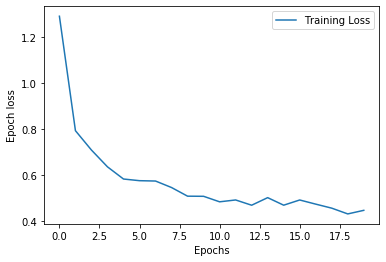

In [133]:
epchs = np.arange(epochs)
plt.plot(losses , label= "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Epoch loss")
plt.legend()

In [103]:
#testing loop to test the network performance on the test set.
model.eval()
accuracy = 0
for activities, labels in test_loader:
    
    if device:
        activities = activities.to('cuda')
        labels = labels.to('cuda')
    logps = model(activities.float())
    prob = torch.exp(logps)
    _, top_class = prob.topk(1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    
print("Accuracy = {}".format(accuracy/len(test_loader)*100))

Accuracy = 91.22474670410156


## Conclusions

This seem a pretty easy task for the neural networks, but the reason that we were able to achieve adequately high accuracy is because the data that was used was highly preprocessed.The raw inertial signal was transform into hand-crafted features that experts think are more correlated to the activity that user is performing.

But this preprocessing requires lots of domain knowledge, you need to have some level of expertise in signal processing to understand and preprocess the signal accurately. Thus this machine learning technique (hand-crafted) way is a tradiotional way of performing classificatio in  HAR.

Nowadays, research is headed towards application of deep learning techniques on HAR tasks. The idea is to automate the feature learning process instead of implicitly telling the model what to look on (Hand Crafted features). There are many studies done recently in which authors have explained the great benefits of deep learning in HAR. Next as my Undergrad research, I will be studying about deep learning techniques that are proposed in the studies and look for ways if we can improve and push a bit furthur. 

##  Analysis of Inertial dataset for application of DL For  FYP part-2 

In [3]:
root = "Data Sets\\UCI HAR Dataset\\UCI HAR Dataset"

train_y = pd.read_csv(root+"\\train\\y_train.txt", header= None)
test_y = pd.read_csv(root+"\\test\\y_test.txt", header=None )

In [4]:
#checking the size of the read data
print(train_y.shape)
print(test_y.shape)

(7352, 1)
(2947, 1)


In [5]:
def read_signals(filename , foldername):
    with open(root + "\\"+ foldername + "\\Inertial Signals\\" + filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
        data = np.array(data, dtype=np.float32)
    return data
def load_data(filename , foldername):
    data =  pd.read_csv(root + "\\"+ foldername + "\\Inertial Signals\\" + filename , delim_whitespace=True)
    #this is in shape (7k , 128)
    return data.values


train_file_names = ['body_acc_x_train.txt','body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

test_file_names = ['body_acc_x_test.txt','body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

train_signals = [] 
test_signals = []   # We want this to be (7k , 128 , 9)
for item in train_file_names:
    train_values = load_data(item , 'train')
    train_signals.append(train_values)
    
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for filename in test_file_names:
    test_values = load_data(filename , "test")
    test_signals.append(test_values)

test_signals = np.transpose(np.array(test_signals) , (1,2,0))

In [6]:
print(train_signals.shape)
print(test_signals.shape)

(7351, 128, 9)
(2946, 128, 9)


In [7]:
##implementatation of custome dataset

class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, labels):
        'Initialization'
        self.labels = np.eye(12)[labels] #to one-hot encode the labels
        self.data = data

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        
        'Generates one sample of data'
        # Select sample
        x = self.data[index]
        # Load data and get label
        y = self.labels[index]

        return x, y

In [8]:
from sklearn import preprocessing
def one_hot_labels (rawLabels):
    encoder = preprocessing.LabelEncoder()
    return np.eye(6)[encoder.fit_transform(rawLabels)] #number of classes are 6
    

In [9]:
#testing the function
print(one_hot_labels(train_y.values))

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


C:\Users\adeen\Miniconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

train_labels = encoder.fit_transform(train_y.values) # for changing the labels range to 0, n_classes -1
dataset = Dataset(train_signals , train_labels )
train_loader  = torch.utils.data.DataLoader(dataset, shuffle= False, batch_size= 32)
#making trainloader for our dataset
activities, labels = next(iter(train_loader))

activities.shape
labels.shape

torch.Size([32, 12])

In [14]:
l1 = np.array([1,2,3,4,5])
l2 = np.array([6,7,8,9,10])

data = np.append(l1,l2, axis=0)
values  = np.reshape(data , (2,5) )
print(values.shape)


(2, 5)


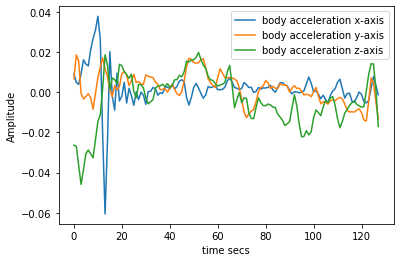

In [15]:
#Visualizing data for better uderstanding.
time =np.arange(128)
acc_x = test_signals[0,:,0]
acc_y = test_signals[0,:,1]
acc_z = test_signals[0,:,2]

plt.plot(acc_x, label="body acceleration x-axis")
plt.plot(acc_y, label="body acceleration y-axis")
plt.plot(acc_z, label="body acceleration z-axis")
plt.xlabel('time secs')
plt.ylabel('Amplitude')
plt.legend()

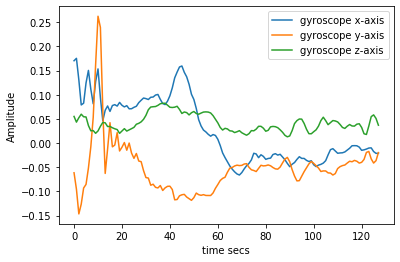

In [16]:
gyro_x = test_signals[0,:,3]
gyro_y = test_signals[0,:,4]
gyro_z = test_signals[0,:,5]

plt.plot(gyro_x, label="gyroscope x-axis")
plt.plot(gyro_y, label="gyroscope y-axis")
plt.plot(gyro_z, label="gyroscope z-axis")
plt.xlabel('time secs')
plt.ylabel('Amplitude')
plt.legend()